In [2]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from datetime import datetime

In [4]:
import pandas as pd

# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Trabajo_final-Master_en_Big_Data/Datos/historico_completo.csv'

# Leer el archivo CSV
ocupacion_historica = pd.read_csv(file_path)

# Mostrar los primeros registros
ocupacion_historica.head()

,id,cod_empresa,linea_codigo,sevar_codigo,dia,franja_horaria,ascensos_promedio,ocupacion_promedio,ocupacion_maxima_promedio,ocupacion_maxima,cantidad,tipo_dia
0,20240801,50,78,4637,2024-08-01,56,42.0,13.627907,24.0,24,1,HABIL
1,20240804,70,128,8385,2024-08-04,59,56.5,16.842647,30.5,31,2,TIPO DOMINGO
2,20240806,50,27,340,2024-08-06,73,28.0,5.301370,15.0,15,1,HABIL
3,20240809,50,55,819,2024-08-09,67,63.0,19.951220,40.0,40,1,HABIL
4,20240809,50,45,4055,2024-08-09,93,41.0,10.445946,24.0,24,1,HABIL


In [5]:
max_fecha_ocupacion = ocupacion_historica['dia'].max()
print('maximo fecha ocupacion:', max_fecha_ocupacion)

min_fecha_ocupacion = ocupacion_historica['dia'].min()
print('minimo fecha ocupacion:', min_fecha_ocupacion)

maximo fecha ocupacion: 2024-10-31
minimo fecha ocupacion: 2024-08-01


In [6]:

precipitaciones = pd.read_csv('/content/drive/MyDrive/Trabajo_final-Master_en_Big_Data/Datos/pluviometros.csv')
precipitaciones.head()

,nombre,fecha,instant_precipitation,ac_10,ac_15,ac_20,ac_25,ac_30,ac_60,ac_120,ac_180,ac_360,ac_720,ac_1080,ac_1440,anio_mes
0,PA,2024-08-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
1,PA,2024-08-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
2,PA,2024-08-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
3,PA,2024-08-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
4,PA,2024-08-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408


In [7]:
max_fecha_precipitaciones = precipitaciones['fecha'].max()
print('maximo fecha precipitaciones:', max_fecha_precipitaciones)

min_fecha_precipitaciones = precipitaciones['fecha'].min()
print('minimo fecha precipitaciones:', min_fecha_precipitaciones)

maximo fecha precipitaciones: 2024-10-31 23:55:00
minimo fecha precipitaciones: 2024-08-01 00:00:00


In [8]:
max_fecha_prec = precipitaciones['fecha'].max()
print('maximo fecha precipitaciones:', max_fecha_prec)

min_fecha_prec = precipitaciones['fecha'].min()
print('minimo fecha precipitaciones:', min_fecha_prec)

maximo fecha precipitaciones: 2024-10-31 23:55:00
minimo fecha precipitaciones: 2024-08-01 00:00:00


In [9]:
print(ocupacion_historica.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040684 entries, 0 to 1040683
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id                         1040684 non-null  int64  
 1   cod_empresa                1040684 non-null  int64  
 2   linea_codigo               1040684 non-null  int64  
 3   sevar_codigo               1040684 non-null  int64  
 4   dia                        1040684 non-null  object 
 5   franja_horaria             1040684 non-null  int64  
 6   ascensos_promedio          1040684 non-null  float64
 7   ocupacion_promedio         1040684 non-null  float64
 8   ocupacion_maxima_promedio  1040684 non-null  float64
 9   ocupacion_maxima           1040684 non-null  int64  
 10  cantidad                   1040684 non-null  int64  
 11  tipo_dia                   1040684 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 95.3+ MB
None


In [10]:
print(precipitaciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317977 entries, 0 to 317976
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   nombre                 317977 non-null  object 
 1   fecha                  317977 non-null  object 
 2   instant_precipitation  278135 non-null  float64
 3   ac_10                  317977 non-null  float64
 4   ac_15                  317977 non-null  float64
 5   ac_20                  317977 non-null  float64
 6   ac_25                  317977 non-null  float64
 7   ac_30                  317977 non-null  float64
 8   ac_60                  317977 non-null  float64
 9   ac_120                 317977 non-null  float64
 10  ac_180                 317977 non-null  float64
 11  ac_360                 317977 non-null  float64
 12  ac_720                 317977 non-null  float64
 13  ac_1080                317977 non-null  float64
 14  ac_1440                317977 non-nu

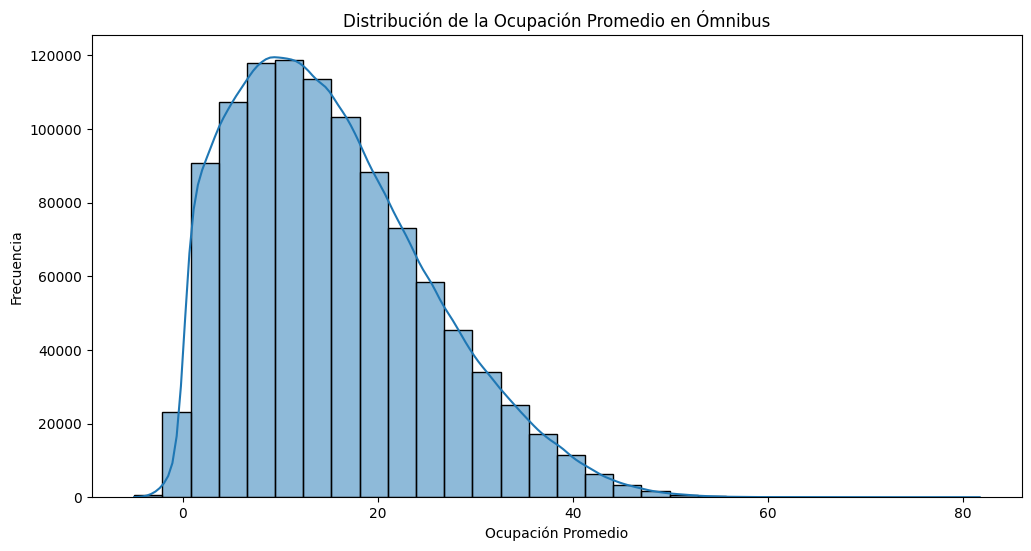

In [11]:
# Configuración de gráficos
plt.figure(figsize=(12,6))
sns.histplot(ocupacion_historica["ocupacion_promedio"], bins=30, kde=True)
plt.title("Distribución de la Ocupación Promedio en Ómnibus")
plt.xlabel("Ocupación Promedio")
plt.ylabel("Frecuencia")
plt.show()

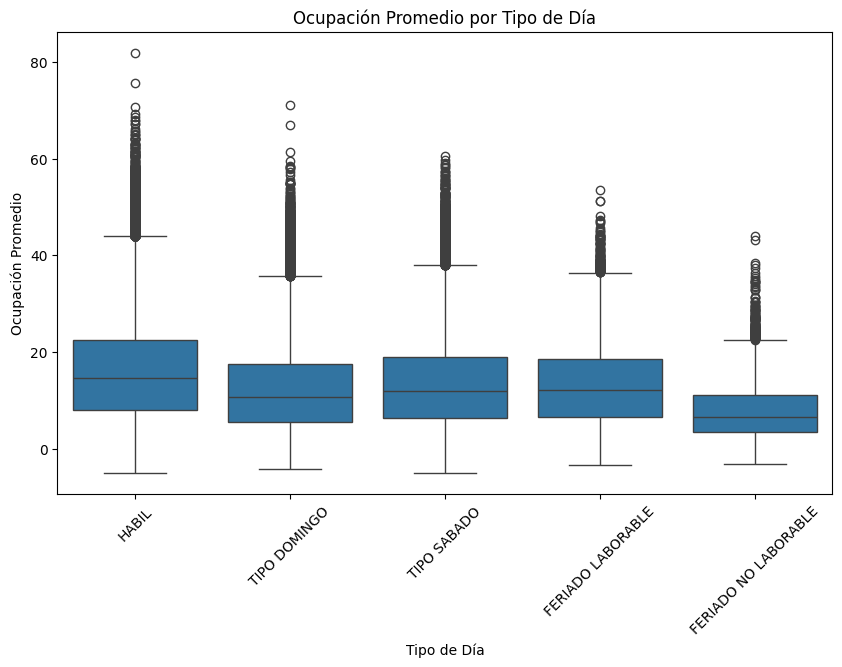

In [12]:
# Boxplot por tipo de día
plt.figure(figsize=(10,6))
sns.boxplot(x="tipo_dia", y="ocupacion_promedio", data=ocupacion_historica)
plt.title("Ocupación Promedio por Tipo de Día")
plt.xlabel("Tipo de Día")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.show()

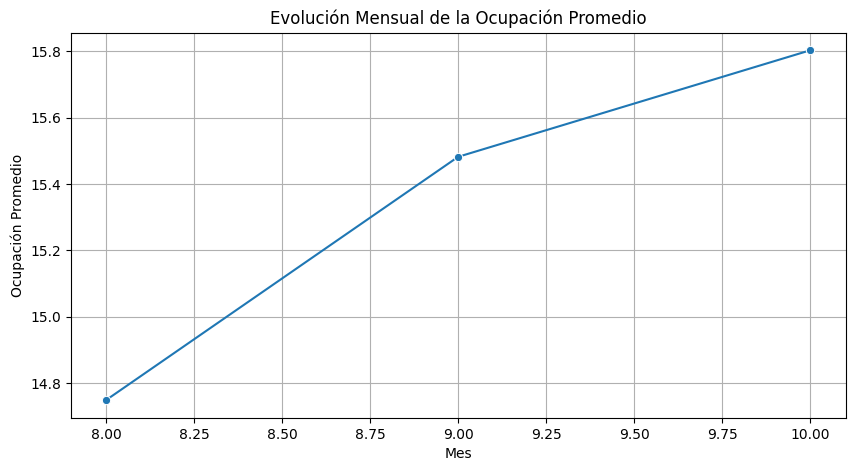

In [13]:
# Se cambia el nombre de "dia" a "fecha", se agrega columna con dia de la semana y mes
ocupacion_historica.rename(columns={'dia': 'fecha'}, inplace=True)
ocupacion_historica['fecha'] = pd.to_datetime(ocupacion_historica['fecha'])

ocupacion_historica["mes"] = ocupacion_historica["fecha"].dt.month
ocupacion_historica["dia_semana"] = ocupacion_historica["fecha"].dt.day_name()

# Media de ocupación por mes
ocupacion_mensual = ocupacion_historica.groupby("mes")["ocupacion_promedio"].mean()
# Media de ocupación por dia de la semana
ocupacion_dia = ocupacion_historica.groupby("dia_semana")["ocupacion_promedio"].mean()

# Graficar ocupación mensual
plt.figure(figsize=(10,5))
sns.lineplot(x=ocupacion_mensual.index, y=ocupacion_mensual.values, marker="o")
plt.title("Evolución Mensual de la Ocupación Promedio")
plt.xlabel("Mes")
plt.ylabel("Ocupación Promedio")
plt.grid()
plt.show()


In [14]:
# Ordenar los días de la semana correctamente
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ocupacion_dia = ocupacion_dia.reindex(dias_ordenados)

In [15]:
ocupacion_dia = ocupacion_dia.rename(index={
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
})
print(ocupacion_dia)

dia_semana
Lunes        15.641529
Martes       16.416674
Miércoles    16.020747
Jueves       15.951225
Viernes      15.959856
Sábado       13.532644
Domingo      12.147889
Name: ocupacion_promedio, dtype: float64


<ipython-input-16-7b543f23b9ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ocupacion_dia.index, y=ocupacion_dia.values, palette="Blues_r")


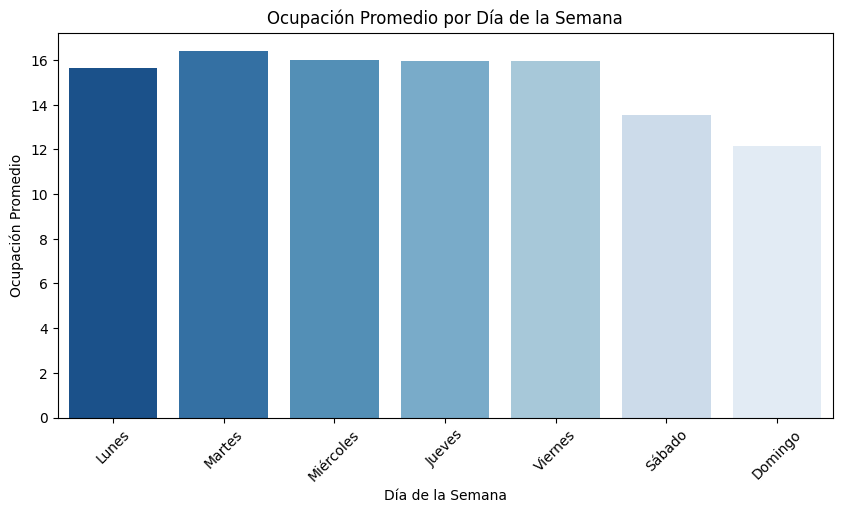

In [16]:
# Graficar ocupación promedio por día de la semana
plt.figure(figsize=(10,5))
sns.barplot(x=ocupacion_dia.index, y=ocupacion_dia.values, palette="Blues_r")
plt.title("Ocupación Promedio por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Calcular estadísticas descriptivas por día de la semana
ocupacion_estadisticas = ocupacion_historica.groupby("dia_semana")["ocupacion_promedio"].describe().reindex(dias_ordenados)

# Mostrar la tabla de estadísticas descriptivas
print(ocupacion_estadisticas)

               count       mean        std       min       25%        50%  \
dia_semana                                                                  
Monday      161670.0  15.641529   9.974899 -5.000000  7.833333  14.319444   
Tuesday     161240.0  16.416674  10.272091 -5.000000  8.370370  15.185972   
Wednesday   161357.0  16.020747  10.168297 -4.571429  8.085714  14.675787   
Thursday    173564.0  15.951225  10.111106 -4.500000  8.058824  14.617647   
Friday      160892.0  15.959856   9.954764 -4.700000  8.240741  14.673577   
Saturday    124264.0  13.532644   9.169043 -5.000000  6.448804  11.955556   
Sunday       97697.0  12.147889   8.916441 -4.200000  5.281690  10.296703   

                  75%        max  
dia_semana                        
Monday      22.020000  69.194030  
Tuesday     23.086957  75.611111  
Wednesday   22.515625  70.574468  
Thursday    22.446809  81.757576  
Friday      22.350187  65.750000  
Saturday    19.030459  60.494118  
Sunday      17.131868  70.

In [18]:
min_ocupacion = ocupacion_historica['ocupacion_promedio'].min()
print(min_ocupacion)

-5.0


In [19]:
ocupacion_historica.describe()

,id,cod_empresa,linea_codigo,sevar_codigo,fecha,franja_horaria,ascensos_promedio,ocupacion_promedio,ocupacion_maxima_promedio,ocupacion_maxima,cantidad,mes
count,1.040684e+06,1.040684e+06,1.040684e+06,1.040684e+06,1040684,1.040684e+06,1.040684e+06,1.040684e+06,1.040684e+06,1.040684e+06,1.040684e+06,1.040684e+06
mean,2.024092e+07,4.459558e+01,1.561304e+02,4.701128e+03,2024-09-15 12:59:31.786248192,5.310557e+01,5.270027e+01,1.534150e+01,2.849254e+01,3.008035e+01,1.216406e+00,9.000320e+00
min,2.024080e+07,1.000000e+01,1.000000e+00,8.000000e+00,2024-08-01 00:00:00,0.000000e+00,0.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,1.000000e+00,8.000000e+00
25%,2.024082e+07,5.000000e+01,3.400000e+01,2.640000e+03,2024-08-23 00:00:00,3.600000e+01,2.300000e+01,7.523810e+00,1.500000e+01,1.500000e+01,1.000000e+00,8.000000e+00
50%,2.024092e+07,5.000000e+01,8.300000e+01,4.480000e+03,2024-09-16 00:00:00,5.300000e+01,4.600000e+01,1.390476e+01,2.600000e+01,2.800000e+01,1.000000e+00,9.000000e+00
75%,2.024101e+07,5.000000e+01,1.400000e+02,7.884000e+03,2024-10-09 00:00:00,7.000000e+01,7.533333e+01,2.165306e+01,4.000000e+01,4.300000e+01,1.000000e+00,1.000000e+01
max,2.024103e+07,7.000000e+01,5.080000e+02,8.875000e+03,2024-10-31 00:00:00,9.500000e+01,2.810000e+02,8.175758e+01,1.000000e+02,1.000000e+02,2.400000e+01,1.000000e+01
std,8.303353e+01,1.580492e+01,1.750815e+02,2.736451e+03,NaN,2.110010e+01,3.673407e+01,9.972124e+00,1.723659e+01,1.834531e+01,5.221563e-01,8.254623e-01


In [20]:
precipitaciones['fecha'] = pd.to_datetime(precipitaciones['fecha'])
precipitaciones['fecha'] = precipitaciones['fecha'].dt.date
precipitaciones.head()

,nombre,fecha,instant_precipitation,ac_10,ac_15,ac_20,ac_25,ac_30,ac_60,ac_120,ac_180,ac_360,ac_720,ac_1080,ac_1440,anio_mes
0,PA,2024-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
1,PA,2024-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
2,PA,2024-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
3,PA,2024-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408
4,PA,2024-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202408


In [21]:
# Convertir fecha a formato datetime
precipitaciones["fecha"] = pd.to_datetime(precipitaciones["fecha"])

# Crear una columna con solo la fecha (sin la hora)
precipitaciones["fecha_dia"] = precipitaciones["fecha"].dt.date

# Agrupar por día y calcular estadísticas de precipitación
precipitacion_diaria = precipitaciones.groupby("fecha_dia").agg({
    "instant_precipitation": "sum",  # Precipitación total del día
    "ac_60": ["mean", "max", lambda x: x.quantile(0.9)],   # Media, máximo y percentil 90
    "ac_1440": ["mean", "max", lambda x: x.quantile(0.9)]  # Media, máximo y percentil 90
}).reset_index()

# Renombrar columnas para claridad
precipitacion_diaria.columns = ["fecha_dia", "precipitacion_total",
                                "ac_60_mean", "ac_60_max", "ac_60_p90",
                                "ac_1440_mean", "ac_1440_max", "ac_1440_p90"]


In [22]:
precipitacion_diaria

,fecha_dia,precipitacion_total,ac_60_mean,ac_60_max,ac_60_p90,ac_1440_mean,ac_1440_max,ac_1440_p90
0,2024-08-01,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
1,2024-08-02,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
2,2024-08-03,125.619999,0.402628,7.62,1.530001,5.919597,17.02,13.46
3,2024-08-04,0.000000,0.000000,0.00,0.000000,3.743480,17.02,12.19
4,2024-08-05,1.780000,0.005705,1.78,0.000000,0.077767,1.78,0.00
...,...,...,...,...,...,...,...,...
87,2024-10-27,0.000000,0.000000,0.00,0.000000,0.000189,0.20,0.00
88,2024-10-28,0.250000,0.000947,0.25,0.000000,0.014205,0.25,0.00
89,2024-10-29,0.000000,0.000000,0.00,0.000000,0.008523,0.25,0.00
90,2024-10-30,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00


In [23]:
# Convertir fecha_dia a datetime para el merge
precipitacion_diaria["fecha_dia"] = pd.to_datetime(precipitacion_diaria["fecha_dia"])

# Unir con la ocupación
df_merged = ocupacion_historica.merge(precipitacion_diaria, left_on="fecha", right_on="fecha_dia", how="left")

# Eliminar columna redundante
df_merged.drop(columns=["fecha_dia"], inplace=True)

In [24]:
df_merged

,id,cod_empresa,linea_codigo,sevar_codigo,fecha,franja_horaria,ascensos_promedio,ocupacion_promedio,ocupacion_maxima_promedio,ocupacion_maxima,...,tipo_dia,mes,dia_semana,precipitacion_total,ac_60_mean,ac_60_max,ac_60_p90,ac_1440_mean,ac_1440_max,ac_1440_p90
0,20240801,50,78,4637,2024-08-01,56,42.0,13.627907,24.0,24,...,HABIL,8,Thursday,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
1,20240804,70,128,8385,2024-08-04,59,56.5,16.842647,30.5,31,...,TIPO DOMINGO,8,Sunday,0.000000,0.000000,0.00,0.00,3.743480,17.02,12.190000
2,20240806,50,27,340,2024-08-06,73,28.0,5.301370,15.0,15,...,HABIL,8,Tuesday,3.180000,0.008830,0.51,0.00,0.100865,1.78,0.250000
3,20240809,50,55,819,2024-08-09,67,63.0,19.951220,40.0,40,...,HABIL,8,Friday,26.840000,0.086026,2.29,0.25,1.755636,3.81,3.050000
4,20240809,50,45,4055,2024-08-09,93,41.0,10.445946,24.0,24,...,HABIL,8,Friday,26.840000,0.086026,2.29,0.25,1.755636,3.81,3.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040679,20241019,50,72,4577,2024-10-19,52,10.0,4.153846,9.0,9,...,TIPO SABADO,10,Saturday,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
1040680,20241021,50,445,4114,2024-10-21,26,69.0,13.871795,27.0,27,...,HABIL,10,Monday,1.020000,0.003864,1.02,0.00,0.043144,1.02,0.000000
1040681,20241021,50,38,630,2024-10-21,75,42.5,13.887500,29.0,31,...,HABIL,10,Monday,1.020000,0.003864,1.02,0.00,0.043144,1.02,0.000000
1040682,20241025,50,444,4742,2024-10-25,69,81.0,29.666667,54.0,54,...,HABIL,10,Friday,75.220001,0.284924,8.13,1.01,14.620660,32.00,25.725001


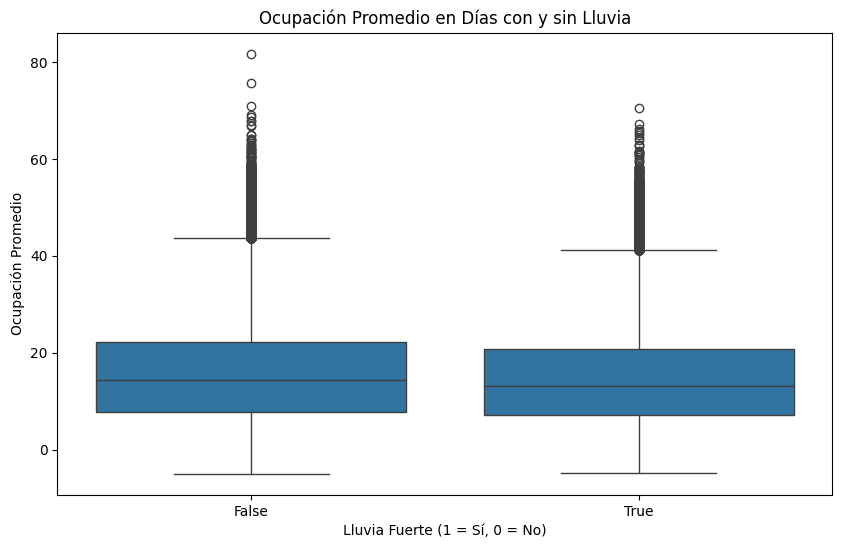

In [25]:
# Definir un umbral de lluvia fuerte (ejemplo: >5 mm de precipitación total en el día)
df_merged["lluvia_fuerte"] = df_merged["precipitacion_total"] > 5

# Comparación con boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="lluvia_fuerte", y="ocupacion_promedio", data=df_merged)
plt.title("Ocupación Promedio en Días con y sin Lluvia")
plt.xlabel("Lluvia Fuerte (1 = Sí, 0 = No)")
plt.ylabel("Ocupación Promedio")
plt.show()

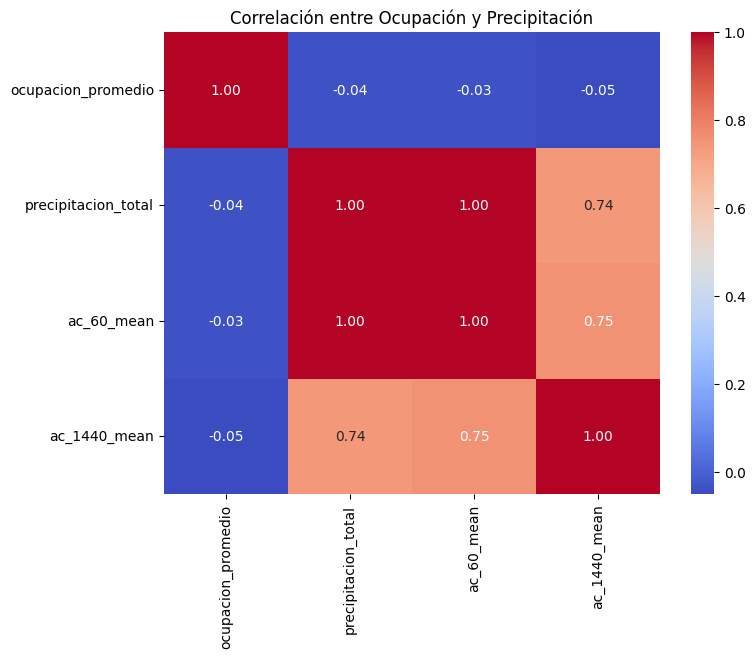

In [26]:
# Calcular correlaciones
correlaciones = df_merged[["ocupacion_promedio", "precipitacion_total", "ac_60_mean", "ac_1440_mean"]].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre Ocupación y Precipitación")
plt.show()

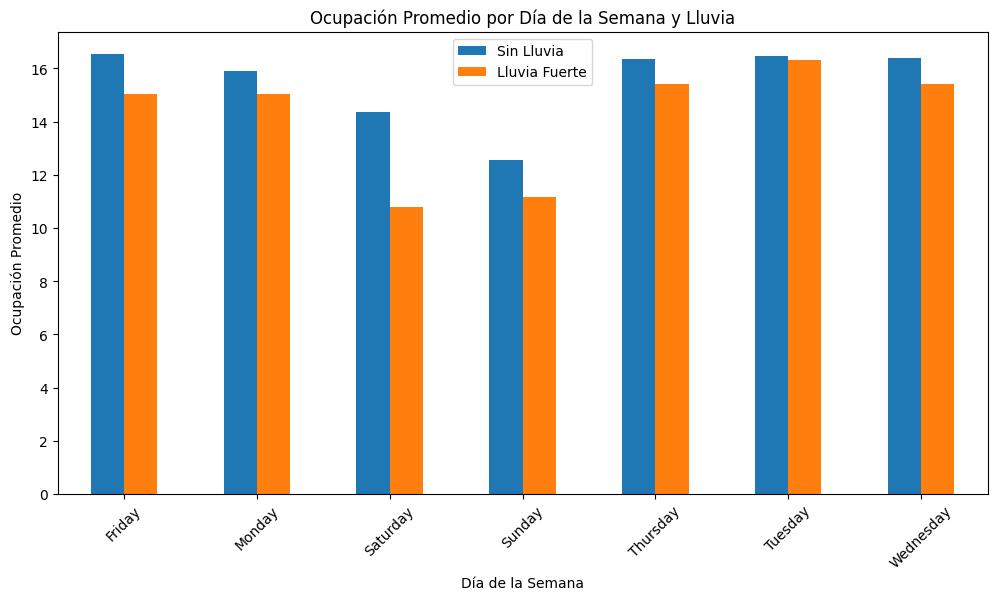

In [27]:
# Agrupar por día de la semana y lluvia fuerte
ocupacion_por_dia = df_merged.groupby(["dia_semana", "lluvia_fuerte"])["ocupacion_promedio"].mean().unstack()

# Gráfico de ocupación promedio por día de la semana y lluvia
ocupacion_por_dia.plot(kind="bar", figsize=(12,6))
plt.title("Ocupación Promedio por Día de la Semana y Lluvia")
plt.xlabel("Día de la Semana")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.legend(["Sin Lluvia", "Lluvia Fuerte"])
plt.show()

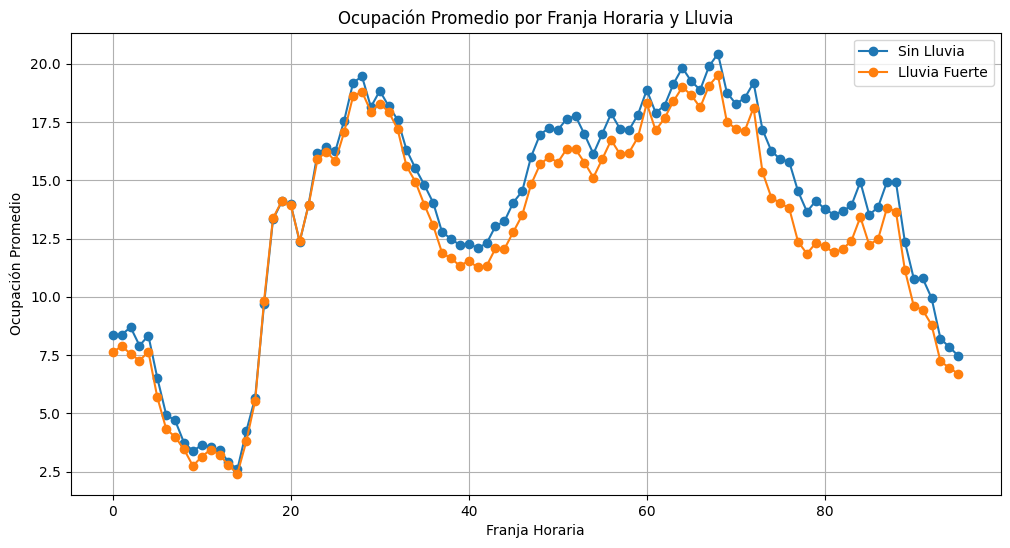

In [28]:
# Agrupar por franja horaria y lluvia fuerte
ocupacion_por_hora = df_merged.groupby(["franja_horaria", "lluvia_fuerte"])["ocupacion_promedio"].mean().unstack()

# Gráfico de líneas
ocupacion_por_hora.plot(figsize=(12,6), marker="o")
plt.title("Ocupación Promedio por Franja Horaria y Lluvia")
plt.xlabel("Franja Horaria")
plt.ylabel("Ocupación Promedio")
plt.legend(["Sin Lluvia", "Lluvia Fuerte"])
plt.grid()
plt.show()

In [29]:
# Calcular la diferencia de ocupación entre días con y sin lluvia
df_merged["impacto_lluvia"] = df_merged["ocupacion_promedio"] - df_merged.groupby("fecha")["ocupacion_promedio"].transform("mean")

# Top días con mayor diferencia de ocupación en lluvia
df_top_impacto = df_merged[df_merged["lluvia_fuerte"] == True].sort_values("impacto_lluvia").head(10)
print(df_top_impacto[["fecha", "ocupacion_promedio", "precipitacion_total", "impacto_lluvia"]])

             fecha  ocupacion_promedio  precipitacion_total  impacto_lluvia
133578  2024-09-04           -4.100000            56.900000      -21.151918
12282   2024-10-01           -4.166667            20.410000      -20.622688
772730  2024-10-14           -4.222222            51.930000      -20.283857
949852  2024-09-04           -3.200000            56.900000      -20.251918
903074  2024-08-27           -3.500000             9.090000      -20.051632
831220  2024-09-17           -3.407407           160.019994      -20.040362
831643  2024-08-15           -3.500000             8.890000      -19.952019
516902  2024-09-04           -2.777778            56.900000      -19.829696
327445  2024-09-04           -2.727273            56.900000      -19.779190
1013103 2024-08-15           -3.285714             8.890000      -19.737733


In [30]:
cantidad = (df_merged['ocupacion_promedio'] < 0).sum()

print(cantidad)

6370


In [31]:
len(df_merged)

1040684

In [33]:
cantidad = (ocupacion_historica['ocupacion_promedio'] < 0).sum()

print(cantidad)

6370


In [34]:
len(ocupacion_historica)

1040684